## Table of Contents

1. [Data Loading](#1.-Data-Loading)
2. [Data Overview](#2.-Data-Overview)
3. [Missing and Duplicated Values Analysis](#3.-Missing-and-Duplicated-Values-Analysis)
4. [Target Variable Analysis](#4.-Target-Variable-Analysis)
5. [Numerical Features Analysis](#5.-Numerical-Features-Analysis)
6. [Categorical Features Analysis](#6.-Categorical-Features-Analysis)
7. [Correlation Analysis](#7.-Correlation-Analysis)
8. [Outlier Detection](#8.-Outlier-Detection)
9. [Key Insights & Recommendations](#9.-Key-Insights-&-Recommendations)

## Basic Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


---
## 1. Data Loading

In [2]:
# Load dataset
df = pd.read_csv('../data/raw/employee_data.csv')

print("=" * 70)
print("DATASET LOADED SUCCESSFULLY")
print("=" * 70)
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

DATASET LOADED SUCCESSFULLY
Shape: (10000, 10)
Rows: 10,000 | Columns: 10


---
## 2. Data Overview

In [3]:
# First 10 rows
print("First 10 rows of the dataset:\n")
df.head(10)

First 10 rows of the dataset:



,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,10001,60,Female,Single,55122.97,Part-time,West,No,1.50,0
1,10002,50,Female,Single,89549.66,Full-time,West,Yes,12.80,1
2,10003,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.80,0
3,10004,64,Female,Married,53877.83,Full-time,Northeast,No,3.30,0
4,10005,29,Male,Single,63404.63,Contract,Midwest,Yes,10.00,0
5,10006,42,Male,Married,66274.58,Contract,West,Yes,1.00,1
6,10007,60,Male,Divorced,63415.31,Full-time,South,Yes,3.30,1
7,10008,40,Male,Married,60616.13,Full-time,West,No,3.10,1
8,10009,44,Female,Single,83459.03,Full-time,South,Yes,0.30,1
9,10010,32,Male,Divorced,72926.06,Part-time,South,No,10.80,0


In [4]:
# Dataset information
print("\n" + "=" * 70)
print("DATASET INFORMATION")
print("=" * 70 + "\n")
df.info()


DATASET INFORMATION

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   gender           10000 non-null  str    
 3   marital_status   10000 non-null  str    
 4   salary           10000 non-null  float64
 5   employment_type  10000 non-null  str    
 6   region           10000 non-null  str    
 7   has_dependents   10000 non-null  str    
 8   tenure_years     10000 non-null  float64
 9   enrolled         10000 non-null  int64  
dtypes: float64(2), int64(3), str(5)
memory usage: 1.0 MB


---
## 3. Missing and Duplicated Values Analysis

In [5]:

# Missing values analysis
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print("\n" + "=" * 70)
print("MISSING VALUES ANALYSIS")
print("=" * 70 + "\n")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize
if missing_df['Missing_Count'].sum() > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_data = missing_df[missing_df['Missing_Count'] > 0]
    
    bars = ax.barh(missing_data.index, missing_data['Percentage'], color='coral')
    ax.set_xlabel('Percentage Missing (%)', fontsize=12)
    ax.set_title('Missing Values by Feature', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add percentage labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}%', ha='left', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n⚠️  Total missing values: {missing_df['Missing_Count'].sum()}")
else:
    print("\n✓ No missing values detected!")


MISSING VALUES ANALYSIS

Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

✓ No missing values detected!


In [6]:
print("\n" + "=" * 70)
print("DUPLICATE ROWS CHECK")
print("=" * 70)

# 1. Check for duplicates
n_duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {n_duplicates}")

if n_duplicates > 0:
    print(f"Percentage of duplicates: {(n_duplicates/len(df)*100):.2f}%")
    
    # 2. Show duplicate rows
    print("\nDuplicate rows:")
    duplicates = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
    print(duplicates)
    
    # 3. Check duplicates excluding employee_id (if data is truly duplicate)
    cols_to_check = [col for col in df.columns if 'id' not in col.lower()]
    n_duplicates_no_id = df.duplicated(subset=cols_to_check).sum()
    
    print(f"\nDuplicates excluding ID column: {n_duplicates_no_id}")
    
    if n_duplicates_no_id > 0:
        print("⚠️  Found duplicate records (same data, different IDs)")
        print("   Recommendation: Investigate and remove if necessary")
    
else:
    print("✓ No duplicate rows found!")

print("\n" + "=" * 70)


DUPLICATE ROWS CHECK

Total duplicate rows: 0
✓ No duplicate rows found!



---
## 4. Target Variable Analysis

Understanding the distribution of our target variable (enrolled) is crucial for:
- Identifying class imbalance
- Choosing appropriate evaluation metrics
- Deciding on sampling strategies


TARGET VARIABLE DISTRIBUTION

Duplicate rows check: 0 duplicates found
✓ No duplicate rows - data is clean

Enrollment Counts:
enrolled
1    6174
0    3826
Name: count, dtype: int64

Enrollment Percentages:
Enrolled (1): 61.74%
Not Enrolled (0): 38.26%

Class Imbalance Ratio (Enrolled/Not Enrolled): 1.61

✓ Classes are relatively balanced


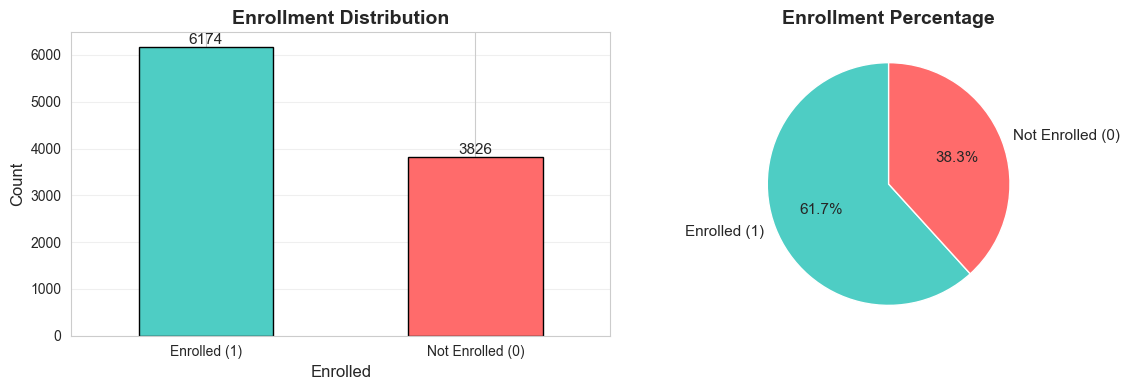

In [7]:
print("\n" + "=" * 70)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 70 + "\n")

# 1. Check for duplicates first
n_duplicates = df.duplicated().sum()
print(f"Duplicate rows check: {n_duplicates} duplicates found")
if n_duplicates == 0:
    print("✓ No duplicate rows - data is clean\n")
else:
    print(f"⚠️  {n_duplicates} duplicate rows detected ({(n_duplicates/len(df)*100):.2f}%)\n")

# 2. Target distribution
target_counts = df['enrolled'].value_counts()
target_pct = df['enrolled'].value_counts(normalize=True)

print("Enrollment Counts:")
print(target_counts)
print(f"\nEnrollment Percentages:")
print(f"Enrolled (1): {target_pct[1]:.2%}")
print(f"Not Enrolled (0): {target_pct[0]:.2%}")

# 3. Class imbalance ratio
imbalance_ratio = target_counts[1] / target_counts[0]
print(f"\nClass Imbalance Ratio (Enrolled/Not Enrolled): {imbalance_ratio:.2f}")

if imbalance_ratio > 2 or imbalance_ratio < 0.5:
    print("\n⚠️  SIGNIFICANT CLASS IMBALANCE DETECTED!")
    print("   Recommendation: Consider SMOTE, class weights, or undersampling")
else:
    print("\n✓ Classes are relatively balanced")

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['#4ECDC4', '#FF6B6B'], edgecolor='black')
axes[0].set_title('Enrollment Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Enrolled', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Enrolled (1)', 'Not Enrolled (0)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', fontsize=11)

# Pie chart
axes[1].pie(target_counts, labels=['Enrolled (1)', 'Not Enrolled (0)'], 
            autopct='%1.1f%%', colors=['#4ECDC4', '#FF6B6B'], 
            startangle=90, textprops={'fontsize': 11})
axes[1].set_title('Enrollment Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)

---
## 5. Numerical Features Analysis

Analyzing: Age, Salary, Tenure Years


NUMERICAL FEATURES - COMPREHENSIVE ANALYSIS

Found 3 numerical features: ['age', 'salary', 'tenure_years']


AGE

Basic Statistics:
  Count:    10000
  Mean:     43.00
  Median:   43.00
  Std Dev:  12.29
  Min:      22.00
  Max:      64.00
  Missing:  0 (0.00%)

By Enrollment Status:
          count  mean  median   std
enrolled                           
0          3826 38.81   37.00 12.91
1          6174 45.60   46.00 11.11

T-test (Independent samples):
  T-statistic: 27.8986
  P-value:     0.000000
  ✓ Significant difference between groups
  → Enrolled group has higher age (mean: 45.60 vs 38.81)

Correlation with enrollment: 0.2687


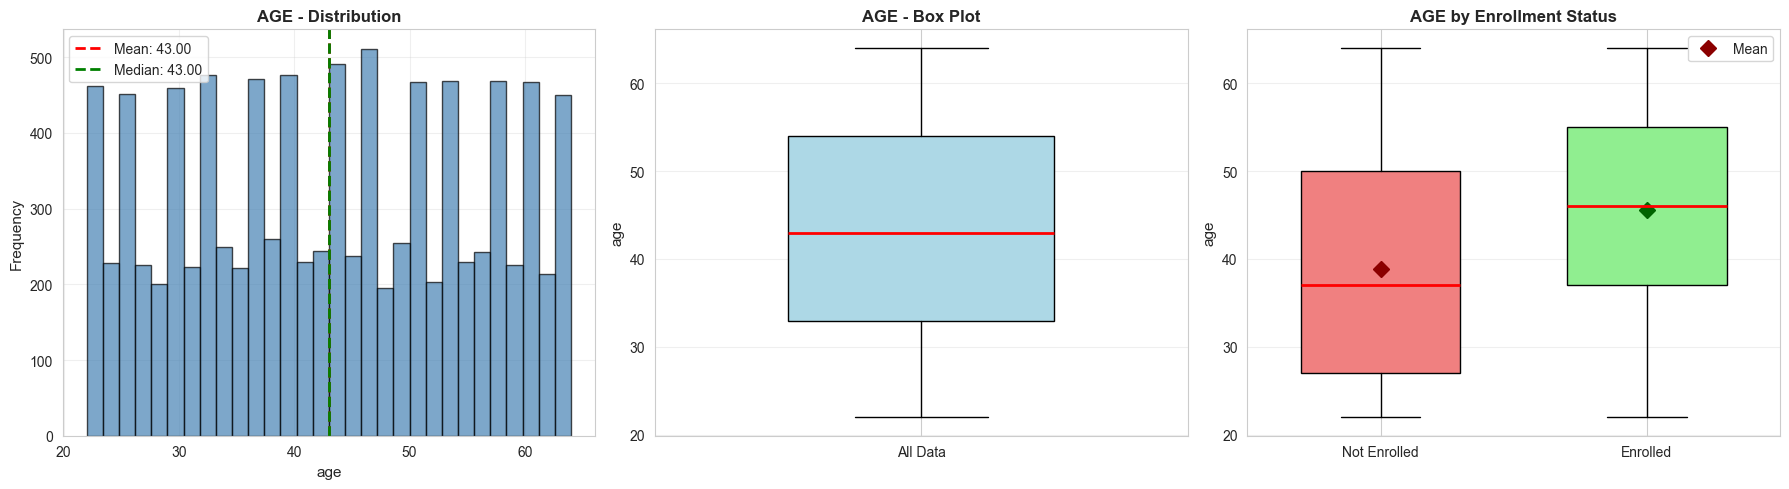

----------------------------------------------------------------------

SALARY

Basic Statistics:
  Count:    10000
  Mean:     65032.97
  Median:   65056.05
  Std Dev:  14923.96
  Min:      2207.79
  Max:      120312.00
  Missing:  0 (0.00%)

By Enrollment Status:
          count     mean   median      std
enrolled                                  
0          3826 58087.02 56407.88 14350.89
1          6174 69337.34 69396.62 13591.27

T-test (Independent samples):
  T-statistic: 39.3749
  P-value:     0.000000
  ✓ Significant difference between groups
  → Enrolled group has higher salary (mean: 69337.34 vs 58087.02)

Correlation with enrollment: 0.3664


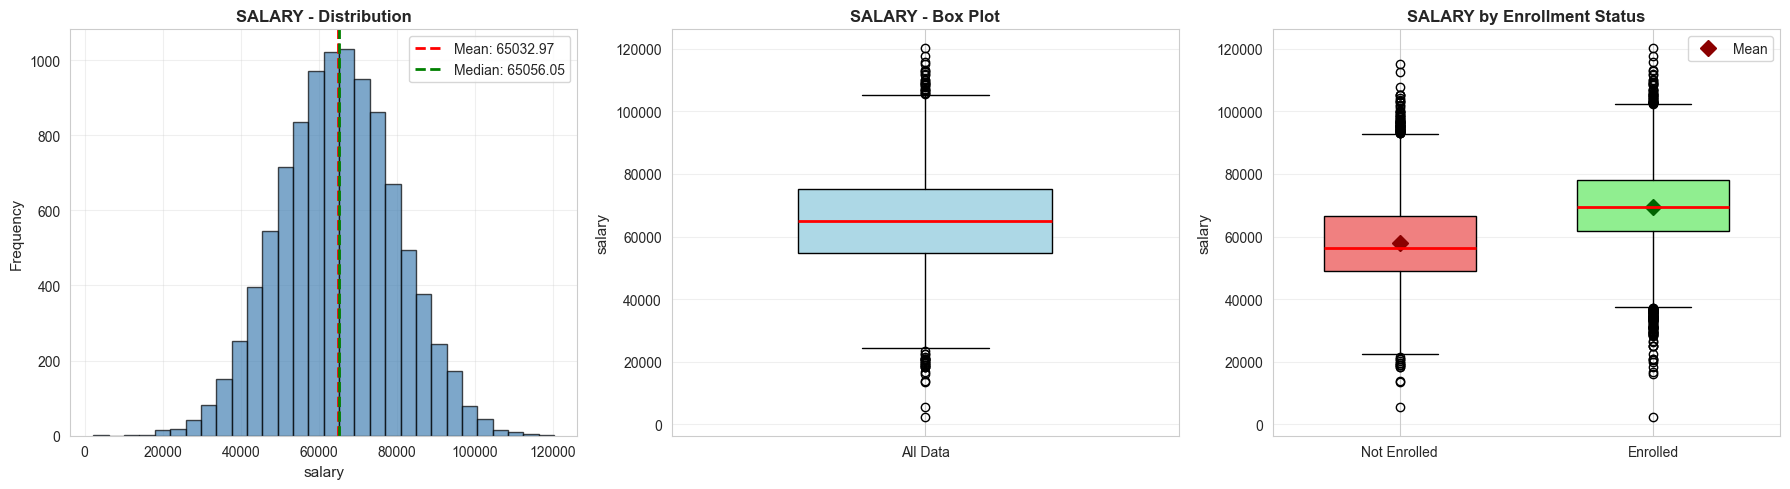

----------------------------------------------------------------------

TENURE_YEARS

Basic Statistics:
  Count:    10000
  Mean:     3.97
  Median:   2.80
  Std Dev:  3.90
  Min:      0.00
  Max:      36.00
  Missing:  0 (0.00%)

By Enrollment Status:
          count  mean  median  std
enrolled                          
0          3826  4.00    2.80 3.90
1          6174  3.94    2.80 3.89

T-test (Independent samples):
  T-statistic: -0.7479
  P-value:     0.454535
  ✗ No significant difference

Correlation with enrollment: -0.0075


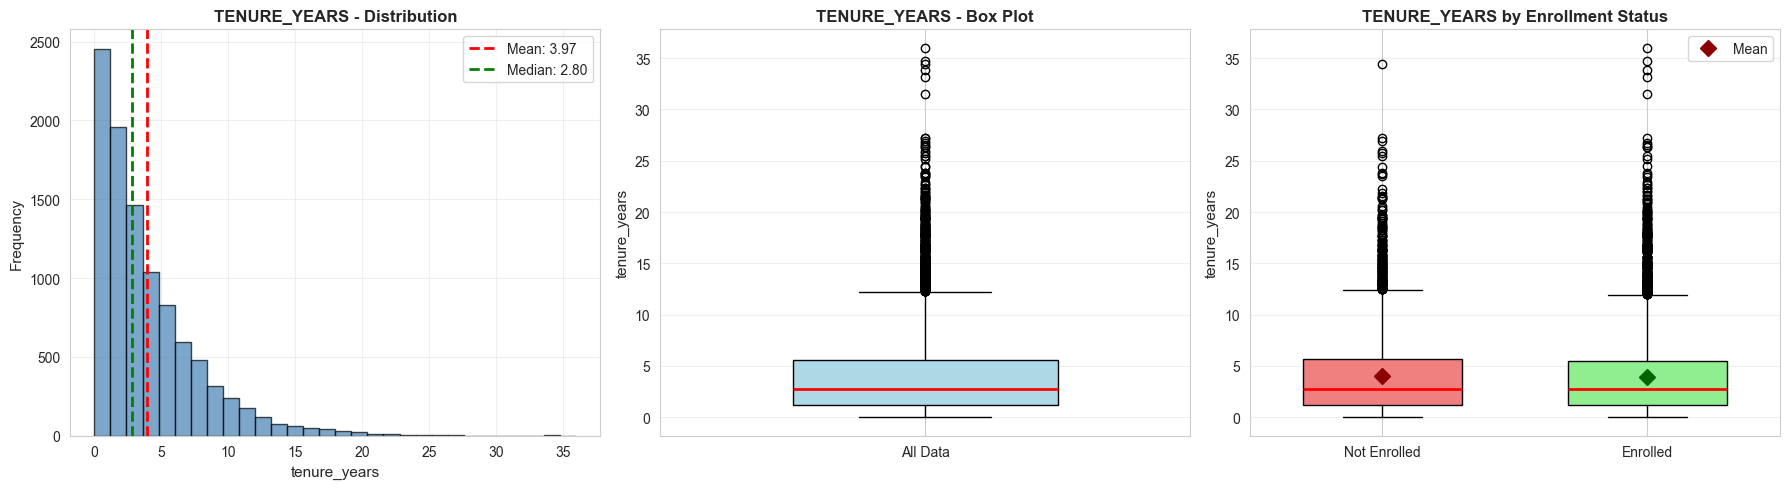

----------------------------------------------------------------------

SUMMARY: NUMERICAL FEATURES SIGNIFICANCE

     Feature  Mean_Enrolled  Mean_Not_Enrolled  T-Statistic  P-Value  Correlation Significant
      salary       69337.34           58087.02        39.37     0.00         0.37         Yes
         age          45.60              38.81        27.90     0.00         0.27         Yes
tenure_years           3.94               4.00        -0.75     0.45        -0.01          No

✓ SIGNIFICANT FEATURES (p < 0.05): 2
  • age (p = 0.0000, correlation = 0.2687)
  • salary (p = 0.0000, correlation = 0.3664)

✗ NOT SIGNIFICANT FEATURES (p >= 0.05): 1
  • tenure_years (p = 0.4545)

✅ Conclusion: Use significant features as strong predictors in modeling


In [8]:
print("\n" + "=" * 70)
print("NUMERICAL FEATURES - COMPREHENSIVE ANALYSIS")
print("=" * 70)

# Automatically identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['enrolled'] and 'id' not in col.lower()]

print(f"\nFound {len(numerical_cols)} numerical features: {numerical_cols}\n")

# Store results for summary
significance_results = []

# Analysis for each feature
for col in numerical_cols:
    print(f"\n{'='*70}")
    print(f"{col.upper()}")
    print(f"{'='*70}")
    
    # Basic Statistics
    print(f"\nBasic Statistics:")
    print(f"  Count:    {df[col].count()}")
    print(f"  Mean:     {df[col].mean():.2f}")
    print(f"  Median:   {df[col].median():.2f}")
    print(f"  Std Dev:  {df[col].std():.2f}")
    print(f"  Min:      {df[col].min():.2f}")
    print(f"  Max:      {df[col].max():.2f}")
    print(f"  Missing:  {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
    
    # Statistics by Enrollment Status
    print(f"\nBy Enrollment Status:")
    enrollment_stats = df.groupby('enrolled')[col].agg(['count', 'mean', 'median', 'std'])
    print(enrollment_stats.to_string())
    
    # T-test for significance
    enrolled = df[df['enrolled'] == 1][col].dropna()
    not_enrolled = df[df['enrolled'] == 0][col].dropna()
    t_stat, p_value = stats.ttest_ind(enrolled, not_enrolled)
    
    print(f"\nT-test (Independent samples):")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value:     {p_value:.6f}")
    
    if p_value < 0.05:
        print(f"  ✓ Significant difference between groups")
        is_significant = "Yes"
        
        # Show which group has higher mean
        if enrolled.mean() > not_enrolled.mean():
            print(f"  → Enrolled group has higher {col} (mean: {enrolled.mean():.2f} vs {not_enrolled.mean():.2f})")
        else:
            print(f"  → Not enrolled group has higher {col} (mean: {not_enrolled.mean():.2f} vs {enrolled.mean():.2f})")
    else:
        print(f"  ✗ No significant difference")
        is_significant = "No"
    
    # Correlation with target
    correlation = df[col].corr(df['enrolled'])
    print(f"\nCorrelation with enrollment: {correlation:.4f}")
    
    # Store results
    significance_results.append({
        'Feature': col,
        'Mean_Enrolled': enrolled.mean(),
        'Mean_Not_Enrolled': not_enrolled.mean(),
        'T-Statistic': t_stat,
        'P-Value': p_value,
        'Correlation': correlation,
        'Significant': is_significant
    })
    
    # Visualizations for this feature
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Left: Histogram
    axes[0].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0].set_title(f'{col.upper()} - Distribution', fontweight='bold', fontsize=12)
    axes[0].set_xlabel(col, fontsize=11)
    axes[0].set_ylabel('Frequency', fontsize=11)
    axes[0].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    axes[0].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Middle: Overall Box Plot
    bp = axes[1].boxplot([df[col].dropna()], patch_artist=True, widths=0.5)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['medians'][0].set_color('red')
    bp['medians'][0].set_linewidth(2)
    axes[1].set_title(f'{col.upper()} - Box Plot', fontweight='bold', fontsize=12)
    axes[1].set_ylabel(col, fontsize=11)
    axes[1].set_xticklabels(['All Data'])
    axes[1].grid(axis='y', alpha=0.3)
    
    # Right: Box Plot by Enrollment
    enrolled_data = df[df['enrolled'] == 1][col].dropna()
    not_enrolled_data = df[df['enrolled'] == 0][col].dropna()
    
    bp2 = axes[2].boxplot([not_enrolled_data, enrolled_data], 
                          labels=['Not Enrolled', 'Enrolled'],
                          patch_artist=True, widths=0.6)
    bp2['boxes'][0].set_facecolor('lightcoral')
    bp2['boxes'][1].set_facecolor('lightgreen')
    for median in bp2['medians']:
        median.set_color('red')
        median.set_linewidth(2)
    
    axes[2].set_title(f'{col.upper()} by Enrollment Status', fontweight='bold', fontsize=12)
    axes[2].set_ylabel(col, fontsize=11)
    axes[2].grid(axis='y', alpha=0.3)
    
    # Add mean markers
    axes[2].plot([1], [not_enrolled_data.mean()], 'D', color='darkred', markersize=8, label='Mean')
    axes[2].plot([2], [enrolled_data.mean()], 'D', color='darkgreen', markersize=8)
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("-" * 70)

# Summary at the end
print("\n" + "=" * 70)
print("SUMMARY: NUMERICAL FEATURES SIGNIFICANCE")
print("=" * 70)

results_df = pd.DataFrame(significance_results).sort_values('P-Value')
results_df_display = results_df.copy()
results_df_display['Mean_Enrolled'] = results_df_display['Mean_Enrolled'].round(2)
results_df_display['Mean_Not_Enrolled'] = results_df_display['Mean_Not_Enrolled'].round(2)
results_df_display['T-Statistic'] = results_df_display['T-Statistic'].round(4)
results_df_display['P-Value'] = results_df_display['P-Value'].round(6)
results_df_display['Correlation'] = results_df_display['Correlation'].round(4)

print("\n" + results_df_display.to_string(index=False))

print("\n" + "=" * 70)
significant_features = [r['Feature'] for r in significance_results if r['Significant'] == 'Yes']
not_significant_features = [r['Feature'] for r in significance_results if r['Significant'] == 'No']

if significant_features:
    print(f"✓ SIGNIFICANT FEATURES (p < 0.05): {len(significant_features)}")
    for feat in significant_features:
        p_val = [r['P-Value'] for r in significance_results if r['Feature'] == feat][0]
        corr = [r['Correlation'] for r in significance_results if r['Feature'] == feat][0]
        print(f"  • {feat} (p = {p_val:.4f}, correlation = {corr:.4f})")
else:
    print("✓ SIGNIFICANT FEATURES: None")

if not_significant_features:
    print(f"\n✗ NOT SIGNIFICANT FEATURES (p >= 0.05): {len(not_significant_features)}")
    for feat in not_significant_features:
        p_val = [r['P-Value'] for r in significance_results if r['Feature'] == feat][0]
        print(f"  • {feat} (p = {p_val:.4f})")

print("=" * 70)
print("\n✅ Conclusion: Use significant features as strong predictors in modeling")
print("=" * 70)

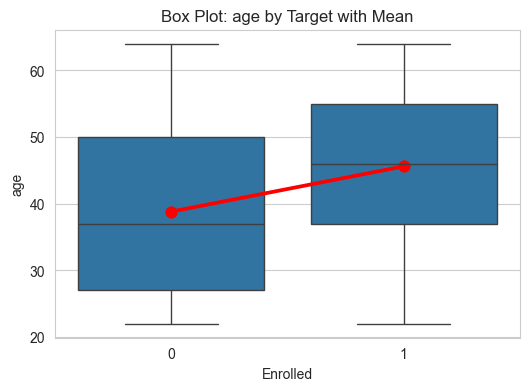

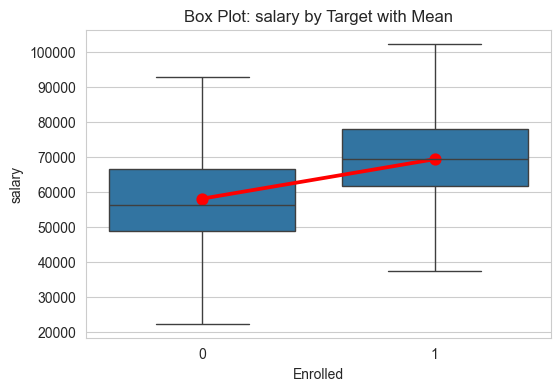

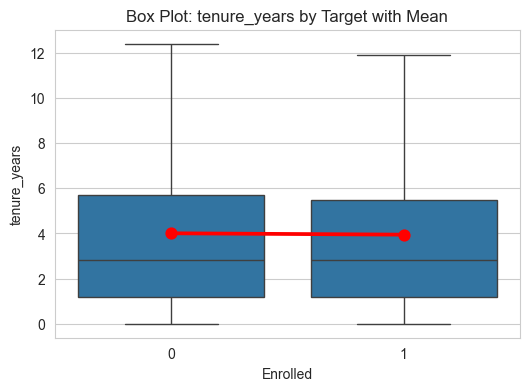

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'enrolled'

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    
    # Box plot
    sns.boxplot(x=target_col, y=df[col], data=df, showfliers=False)
    
    # Overlay the mean using a point plot
    sns.pointplot(x=target_col, y=df[col], data=df, estimator='mean', color='red', ci=None)
    
    plt.title(f'Box Plot: {col} by Target with Mean')
    plt.ylabel(col)
    plt.xlabel('Enrolled')
    plt.show()


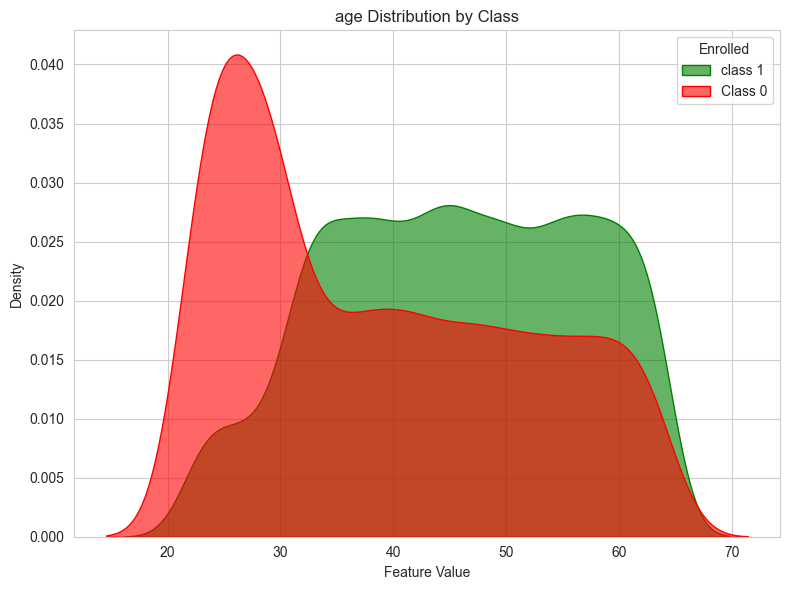

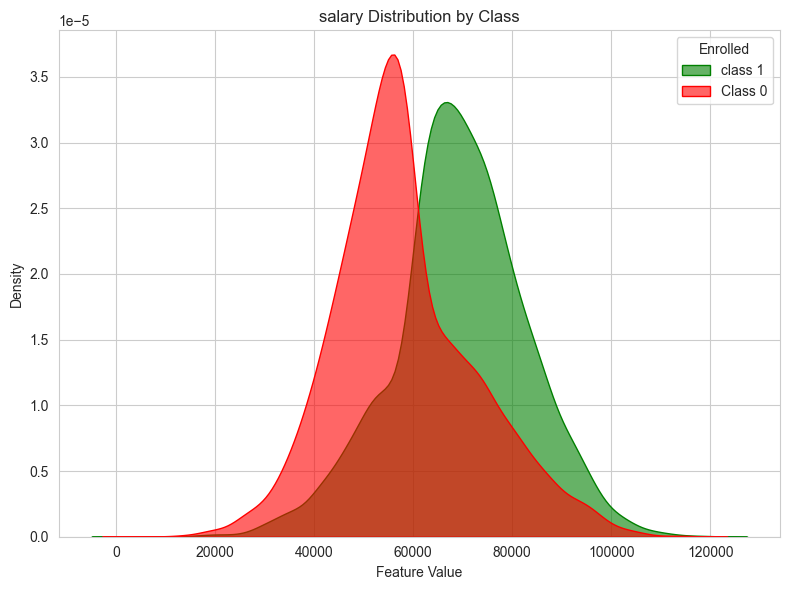

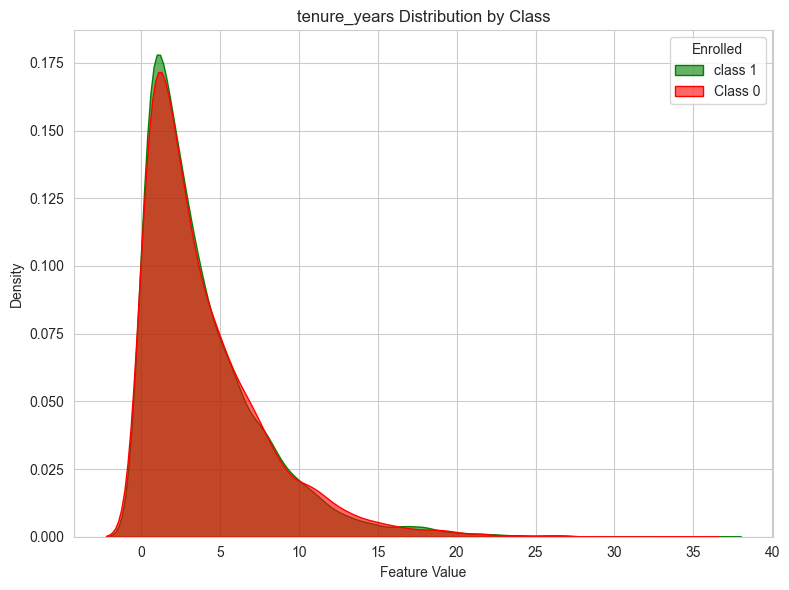

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'enrolled'
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop(["employee_id", "enrolled"])

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    
    # Plot both classes with the corrected colors
    sns.kdeplot(data=df, x=col, hue=target_col, fill=True, alpha=0.6, common_norm=False, palette={0: "red", 1: "green"})
    
    plt.title(f'{col} Distribution by Class')
    plt.xlabel('Feature Value')
    plt.ylabel('Density')
    plt.legend(title='Enrolled', labels=['class 1', 'Class 0'])
    
    plt.tight_layout()
    plt.show()


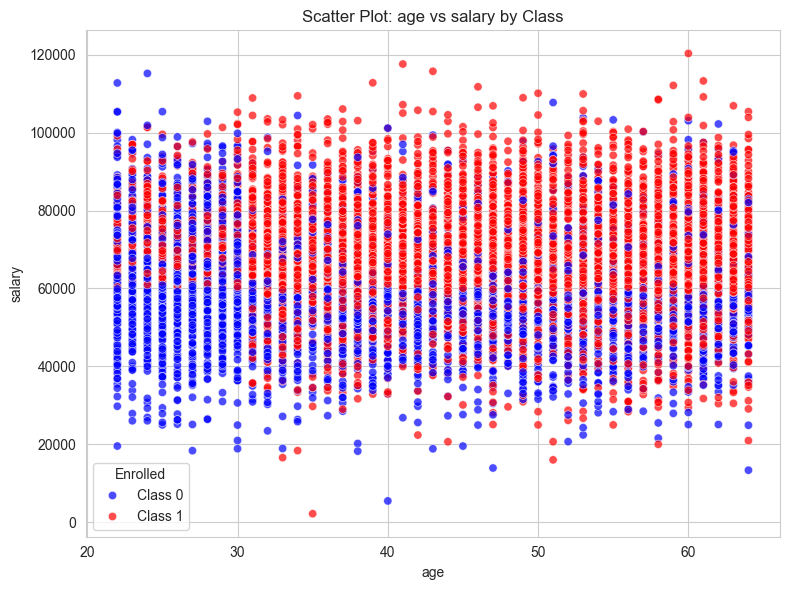

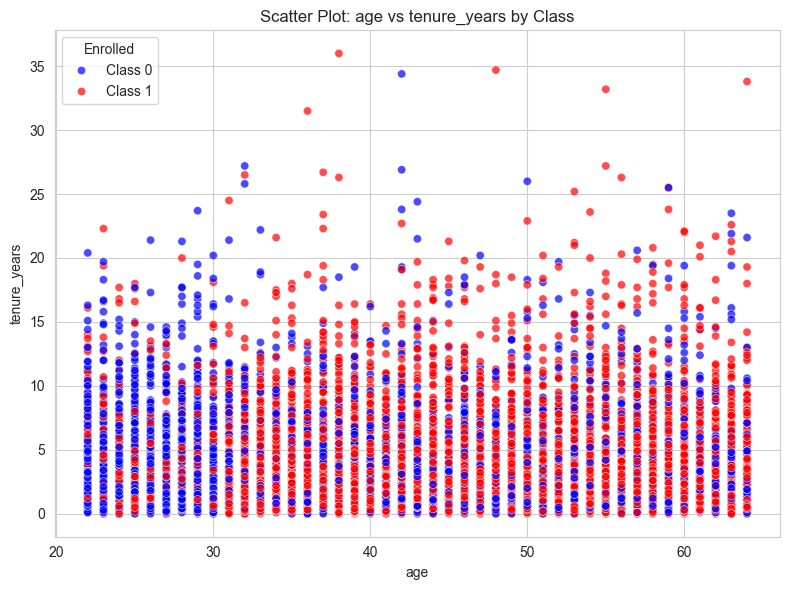

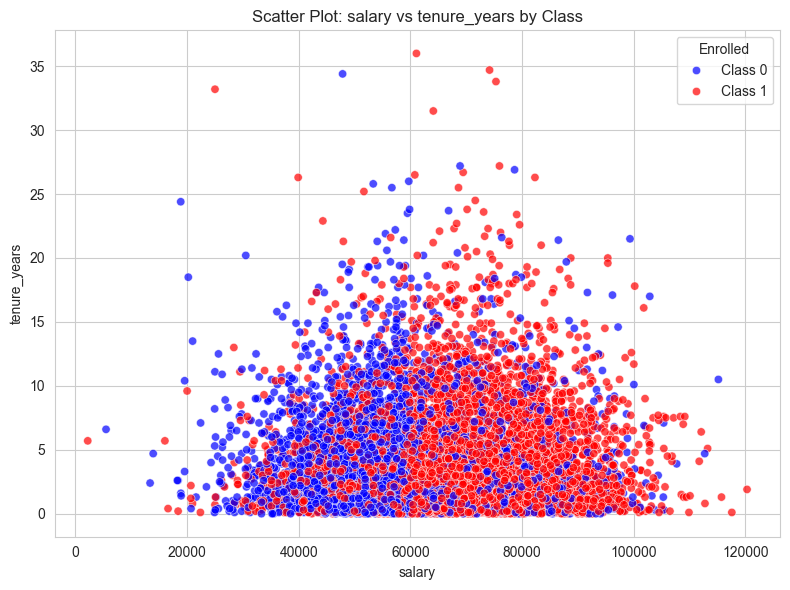

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'enrolled'
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop(["employee_id", "enrolled"])

for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.figure(figsize=(8, 6))
        ax = sns.scatterplot(
            data=df, x=numerical_cols[i], y=numerical_cols[j], hue=target_col, palette=['blue', 'red'], alpha=0.7)
        
        plt.title(f'Scatter Plot: {numerical_cols[i]} vs {numerical_cols[j]} by Class')
        plt.xlabel(numerical_cols[i])
        plt.ylabel(numerical_cols[j])
        
        # Explicitly set legend labels
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, ['Class 0', 'Class 1'], title='Enrolled')
        
        plt.tight_layout()
        plt.show()


Significance difference between salary and age of enrolled and not enrolled


---
## 6. Categorical Features Analysis

Analyzing relationship between categorical features and enrollment


CATEGORICAL FEATURES - COMPREHENSIVE ANALYSIS

Found 5 categorical features: ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']


GENDER

Distribution:
  Male                :  4815 ( 48.2%)
  Female              :  4810 ( 48.1%)
  Other               :   375 (  3.8%)

Unique values: 3

Enrollment Rate:
  Other               :  64.3%
  Male                :  61.7%
  Female              :  61.6%

Chi-square test:
  Chi-square statistic: 1.0597
  P-value: 0.5887
  ✗ Not significant


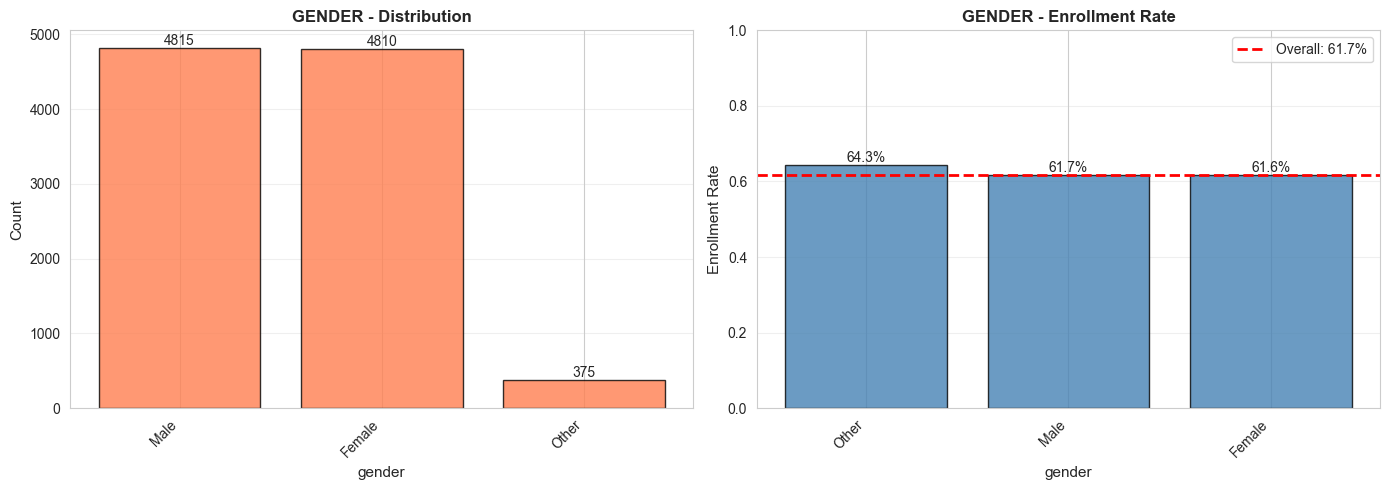

----------------------------------------------------------------------

MARITAL_STATUS

Distribution:
  Married             :  4589 ( 45.9%)
  Single              :  3877 ( 38.8%)
  Divorced            :  1001 ( 10.0%)
  Widowed             :   533 (  5.3%)

Unique values: 4

Enrollment Rate:
  Single              :  62.9%
  Widowed             :  62.5%
  Married             :  61.0%
  Divorced            :  60.0%

Chi-square test:
  Chi-square statistic: 4.7118
  P-value: 0.1942
  ✗ Not significant


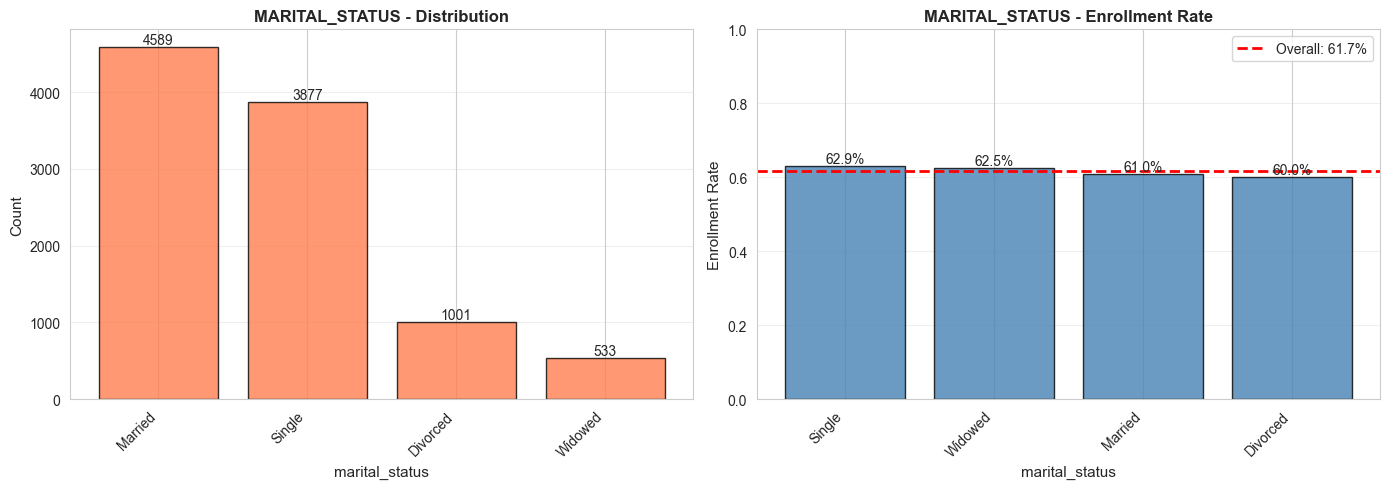

----------------------------------------------------------------------

EMPLOYMENT_TYPE

Distribution:
  Full-time           :  7041 ( 70.4%)
  Part-time           :  1973 ( 19.7%)
  Contract            :   986 (  9.9%)

Unique values: 3

Enrollment Rate:
  Full-time           :  75.3%
  Contract            :  31.2%
  Part-time           :  28.5%

Chi-square test:
  Chi-square statistic: 1862.6107
  P-value: 0.0000
  ✓ Significant association with enrollment


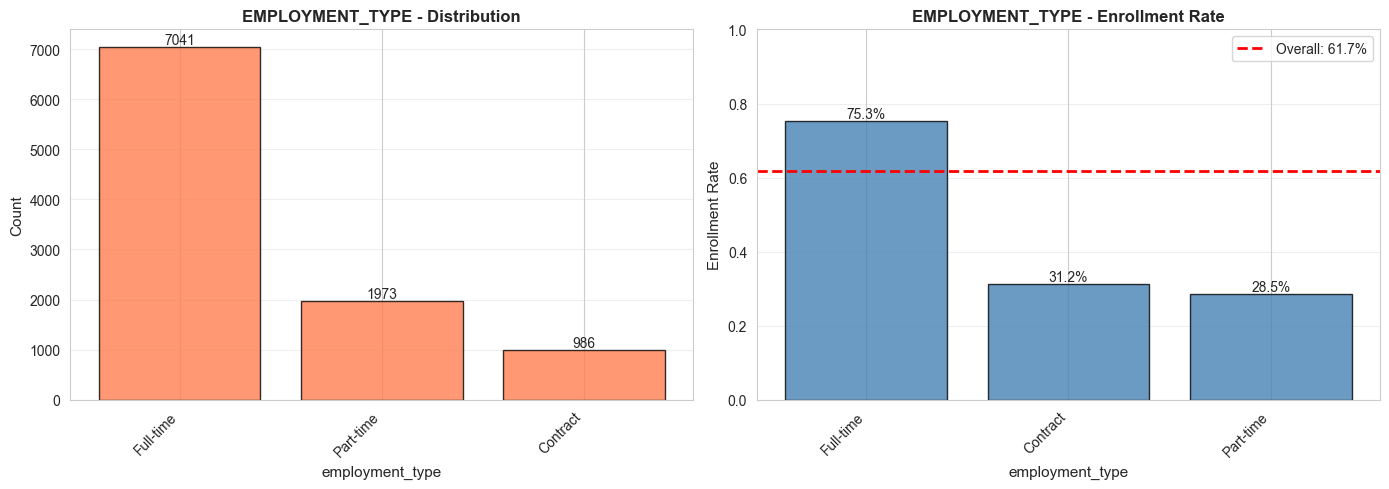

----------------------------------------------------------------------

REGION

Distribution:
  West                :  2582 ( 25.8%)
  Northeast           :  2506 ( 25.1%)
  Midwest             :  2488 ( 24.9%)
  South               :  2424 ( 24.2%)

Unique values: 4

Enrollment Rate:
  South               :  62.8%
  Midwest             :  61.7%
  West                :  61.3%
  Northeast           :  61.2%

Chi-square test:
  Chi-square statistic: 1.8012
  P-value: 0.6147
  ✗ Not significant


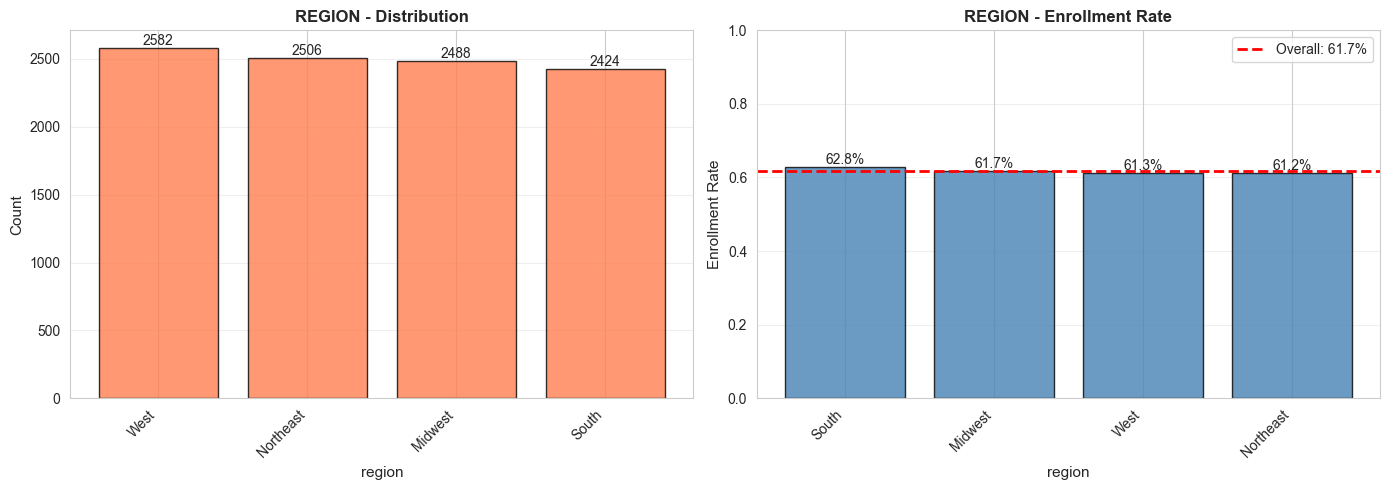

----------------------------------------------------------------------

HAS_DEPENDENTS

Distribution:
  Yes                 :  5993 ( 59.9%)
  No                  :  4007 ( 40.1%)

Unique values: 2

Enrollment Rate:
  Yes                 :  79.7%
  No                  :  34.8%

Chi-square test:
  Chi-square statistic: 2050.2277
  P-value: 0.0000
  ✓ Significant association with enrollment


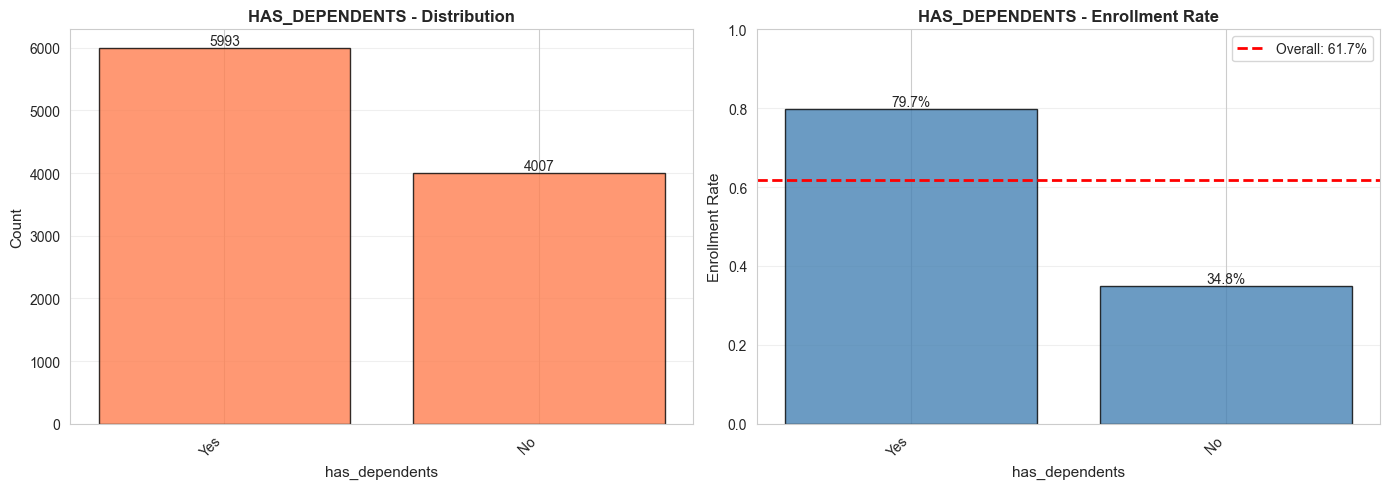

----------------------------------------------------------------------

SUMMARY: CATEGORICAL FEATURES SIGNIFICANCE

        Feature    Chi2  P-Value Significant
employment_type 1862.61     0.00         Yes
 has_dependents 2050.23     0.00         Yes
 marital_status    4.71     0.19          No
         gender    1.06     0.59          No
         region    1.80     0.61          No

✓ SIGNIFICANT FEATURES (p < 0.05): 2
  • employment_type (p = 0.0000)
  • has_dependents (p = 0.0000)

✗ NOT SIGNIFICANT FEATURES (p >= 0.05): 3
  • gender (p = 0.5887)
  • marital_status (p = 0.1942)
  • region (p = 0.6147)

✅ Conclusion: Use significant features as strong predictors in modeling


In [ ]:
print("\n" + "=" * 70)
print("CATEGORICAL FEATURES - COMPREHENSIVE ANALYSIS")
print("=" * 70)

import os
os.makedirs("categorical_plots", exist_ok=True)

# Automatically identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if 'id' not in col.lower()]

print(f"\nFound {len(categorical_cols)} categorical features:")
for col in categorical_cols:
    print(f"  • {col}")

# Store results for summary
significance_results = []
overall_rate = df['enrolled'].mean()

# ==========================================================
# Feature-by-Feature Analysis
# ==========================================================
for col in categorical_cols:
    
    print(f"\n{'='*70}")
    print(f"{col.upper()}")
    print(f"{'='*70}")
    
    # -----------------------------
    # Distribution
    # -----------------------------
    print("\nDistribution:")
    
    value_counts = df[col].value_counts()
    value_pct = (value_counts / len(df) * 100).round(1)
    
    for category in value_counts.index:
        print(f"  {str(category):20s}: {value_counts[category]:5d} ({value_pct[category]:5.1f}%)")
    
    print(f"\nUnique values: {df[col].nunique()}")
    
    # -----------------------------
    # Enrollment Rate
    # -----------------------------
    print("\nEnrollment Rate:")
    
    enrollment_rate = (
        df.groupby(col)['enrolled']
        .mean()
        .sort_values(ascending=False) * 100
    )
    
    for category in enrollment_rate.index:
        print(f"  {str(category):20s}: {enrollment_rate[category]:5.1f}%")
    
    # -----------------------------
    # Chi-square Test
    # -----------------------------
    contingency = pd.crosstab(df[col], df['enrolled'])
    chi2, p_value, dof, _ = chi2_contingency(contingency)
    
    print("\nChi-square test:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  P-value: {p_value:.6f}")
    
    is_significant = "Yes" if p_value < 0.05 else "No"
    
    if is_significant == "Yes":
        print("  ✓ Significant association with enrollment")
    else:
        print("  ✗ Not statistically significant")
    
    significance_results.append({
        'Feature': col,
        'Chi2': chi2,
        'P-Value': p_value,
        'Significant': is_significant
    })
    
    # -----------------------------
    # Visualization
    # -----------------------------
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribution Plot
    bars1 = axes[0].bar(
        value_counts.index.astype(str),
        value_counts.values
    )
    axes[0].set_title(f"{col.upper()} - Distribution", fontweight='bold')
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    for bar in bars1:
        height = bar.get_height()
        axes[0].text(
            bar.get_x() + bar.get_width()/2,
            height,
            f"{int(height)}",
            ha='center',
            va='bottom'
        )
    
    # Enrollment Rate Plot
    enrollment_raw = df.groupby(col)['enrolled'].mean().sort_values(ascending=False)
    
    bars2 = axes[1].bar(
        enrollment_raw.index.astype(str),
        enrollment_raw.values
    )
    
    axes[1].set_title(f"{col.upper()} - Enrollment Rate", fontweight='bold')
    axes[1].set_ylabel("Enrollment Rate")
    axes[1].set_ylim([0, 1])
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].axhline(y=overall_rate, linestyle='--')
    axes[1].grid(axis='y', alpha=0.3)
    
    for bar in bars2:
        height = bar.get_height()
        axes[1].text(
            bar.get_x() + bar.get_width()/2,
            height,
            f"{height:.1%}",
            ha='center',
            va='bottom'
        )
    
    plt.tight_layout()
    
    # Save figure automatically
    filename = f"categorical_plots/{col.lower().replace(' ', '_')}_analysis.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    
    plt.show()
    plt.close()
    
    print("-" * 70)

# ==========================================================
# Summary Section
# ==========================================================
print("\n" + "=" * 70)
print("SUMMARY: CATEGORICAL FEATURES SIGNIFICANCE")
print("=" * 70)

results_df = (
    pd.DataFrame(significance_results)
    .sort_values('P-Value')
)

print("\n" + results_df.to_string(index=False))

print("\n" + "=" * 70)

significant_features = results_df[results_df['Significant'] == "Yes"]
not_significant_features = results_df[results_df['Significant'] == "No"]

if not significant_features.empty:
    print(f"✓ SIGNIFICANT FEATURES (p < 0.05): {len(significant_features)}")
    for _, row in significant_features.iterrows():
        print(f"  • {row['Feature']} (p = {row['P-Value']:.6f})")
else:
    print("✓ SIGNIFICANT FEATURES: None")

if not not_significant_features.empty:
    print(f"\n✗ NOT SIGNIFICANT FEATURES (p >= 0.05): {len(not_significant_features)}")
    for _, row in not_significant_features.iterrows():
        print(f"  • {row['Feature']} (p = {row['P-Value']:.6f})")

print("=" * 70)
print("\n✅ Conclusion: Use statistically significant features as strong predictors in modeling.")
print("=" * 70)

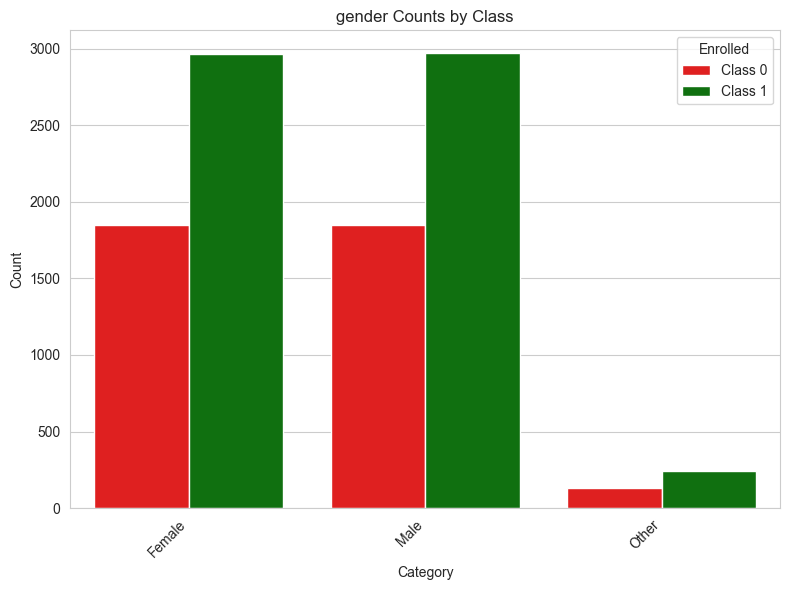

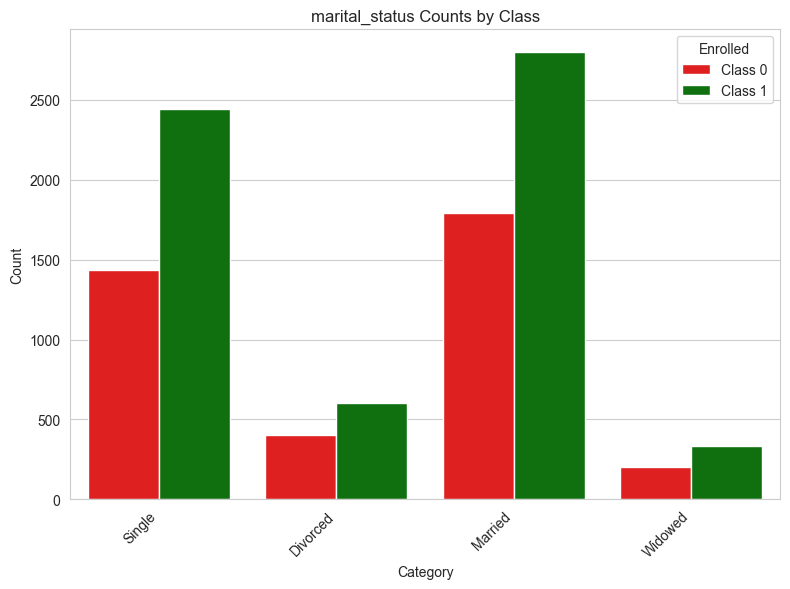

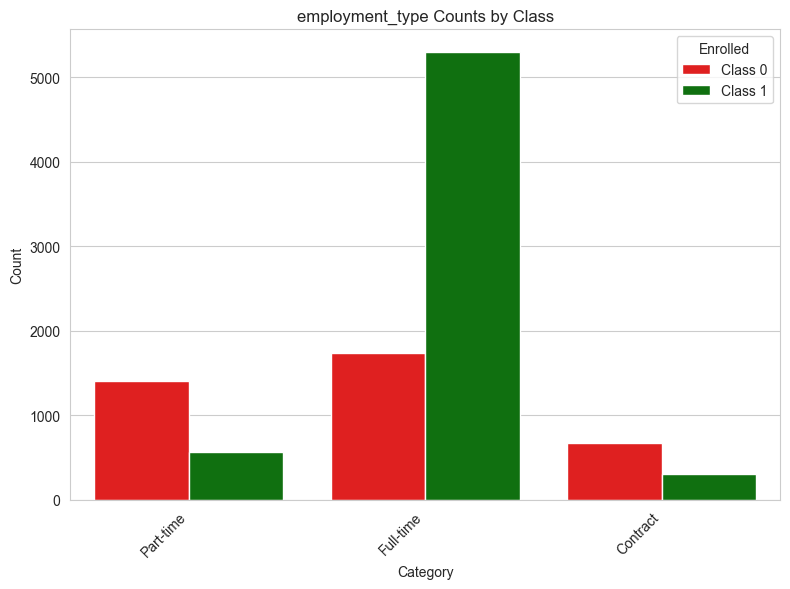

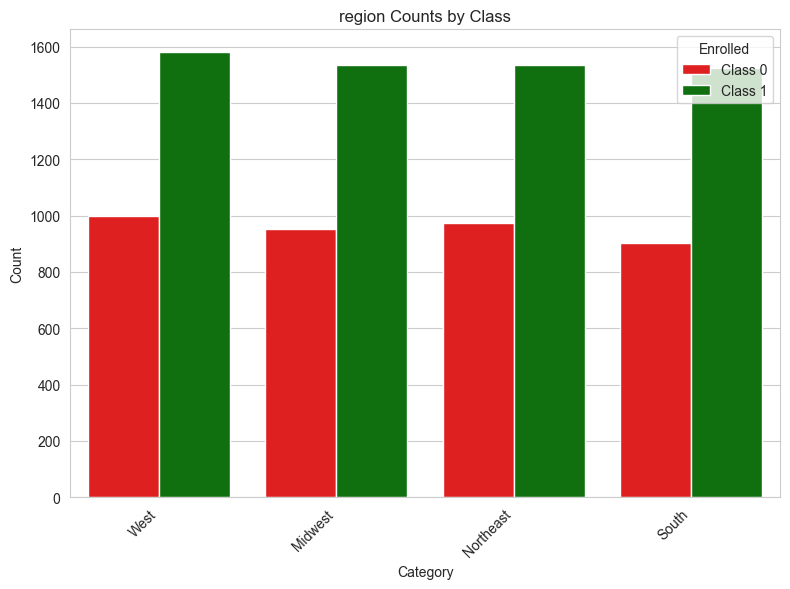

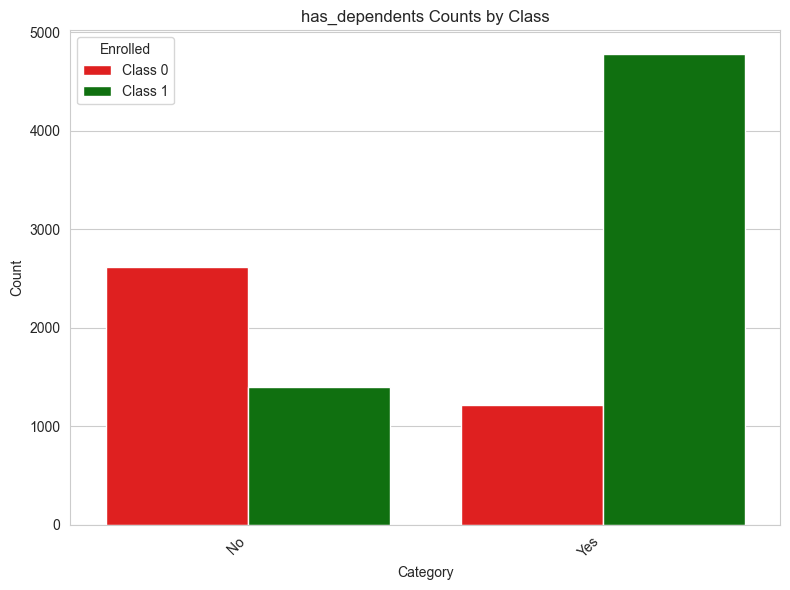

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'enrolled'
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    
    # Plot the count of each category by class
    sns.countplot(data=df, x=col, hue=target_col, palette=['red', 'green'])
    
    plt.title(f'{col} Counts by Class')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Enrolled', labels=['Class 0', 'Class 1'])
    
    plt.tight_layout()
    plt.show()


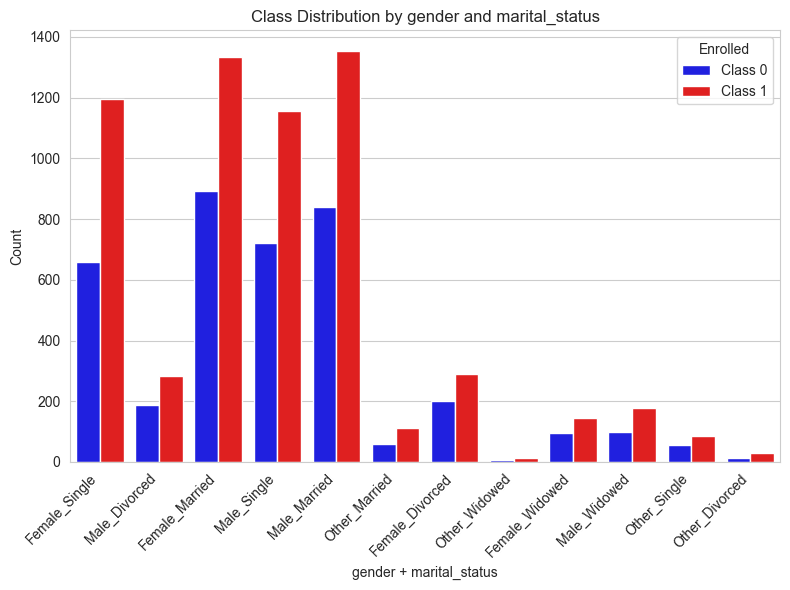

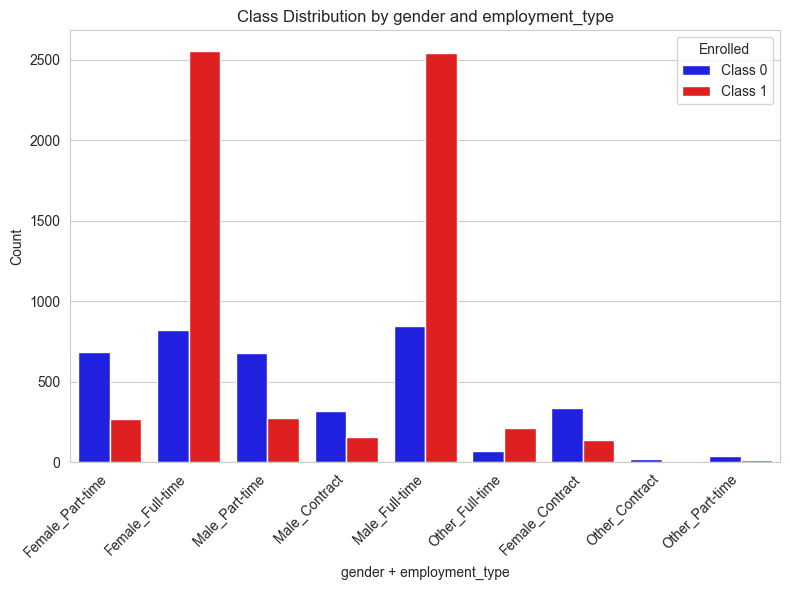

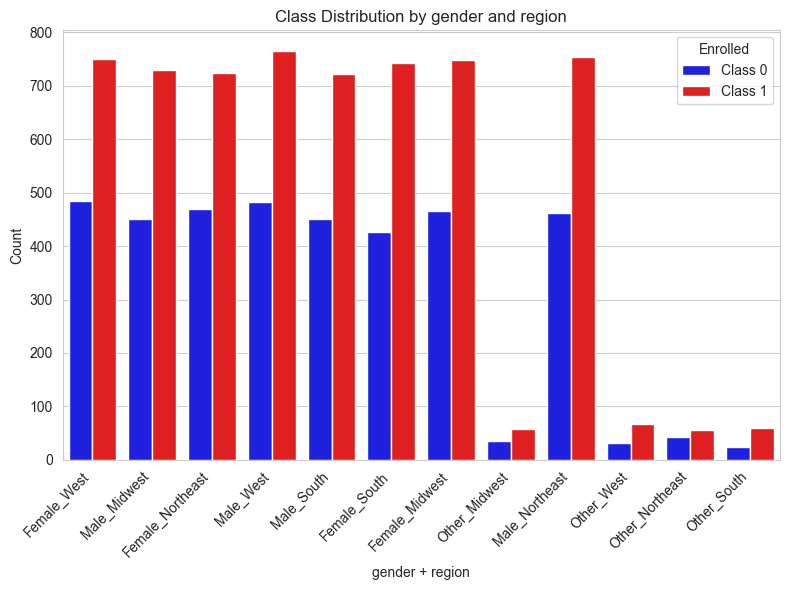

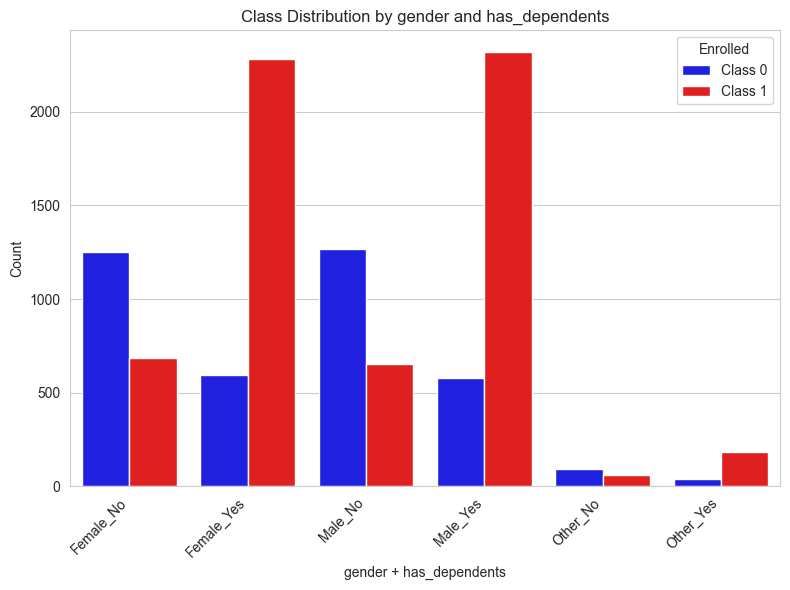

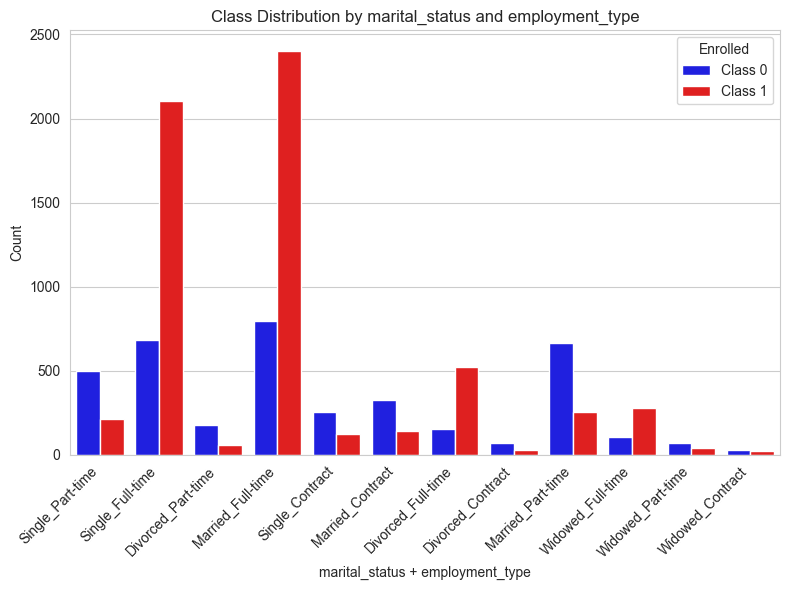

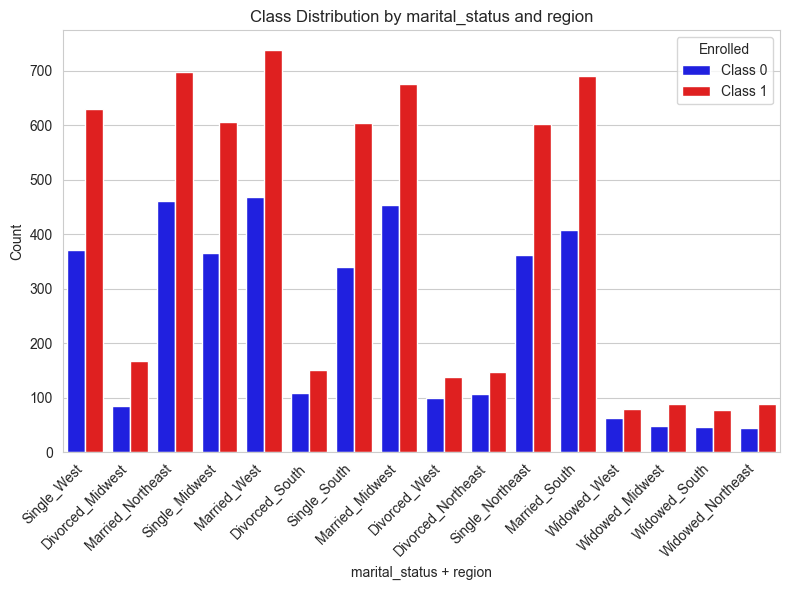

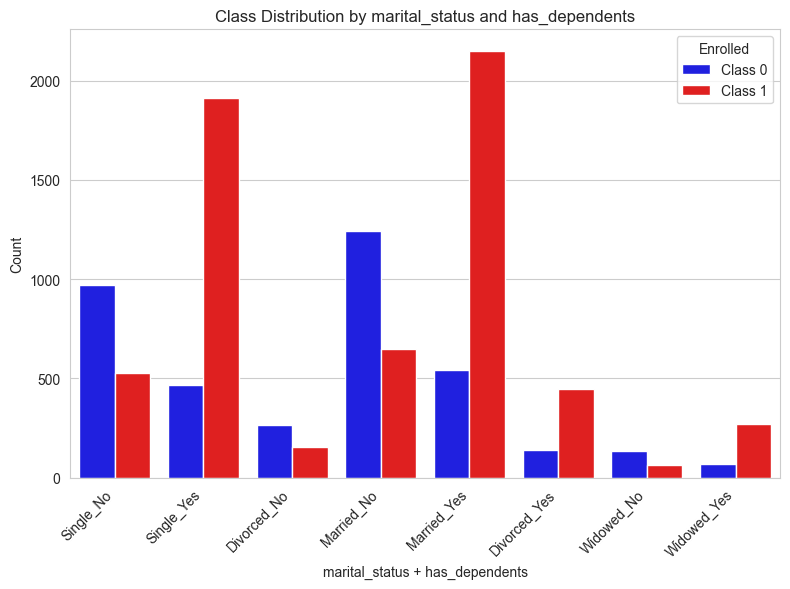

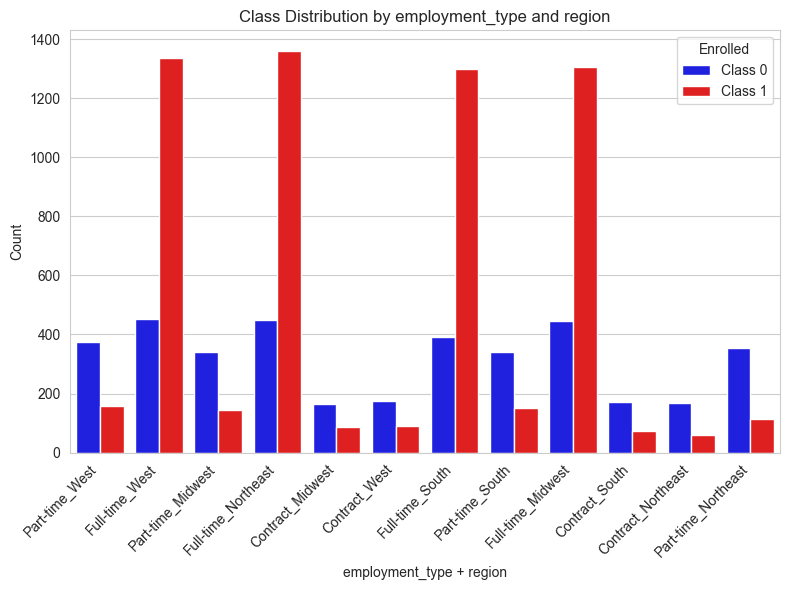

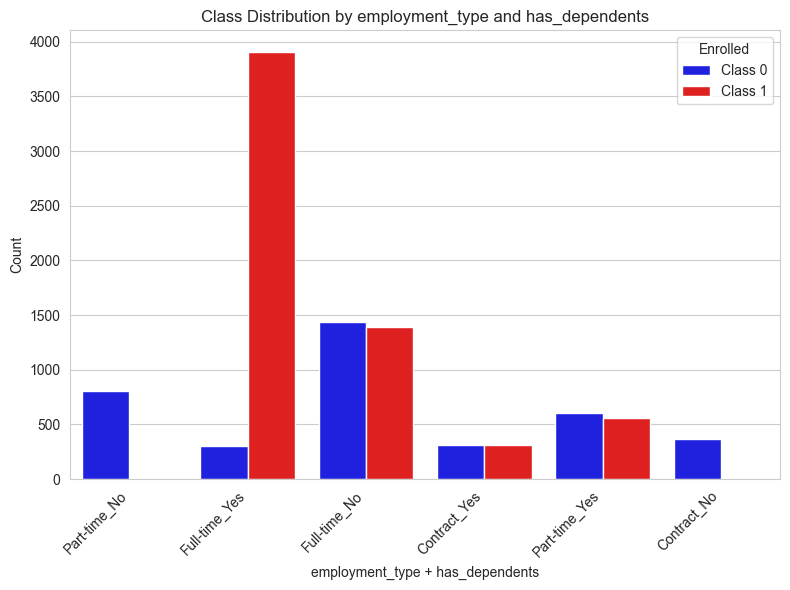

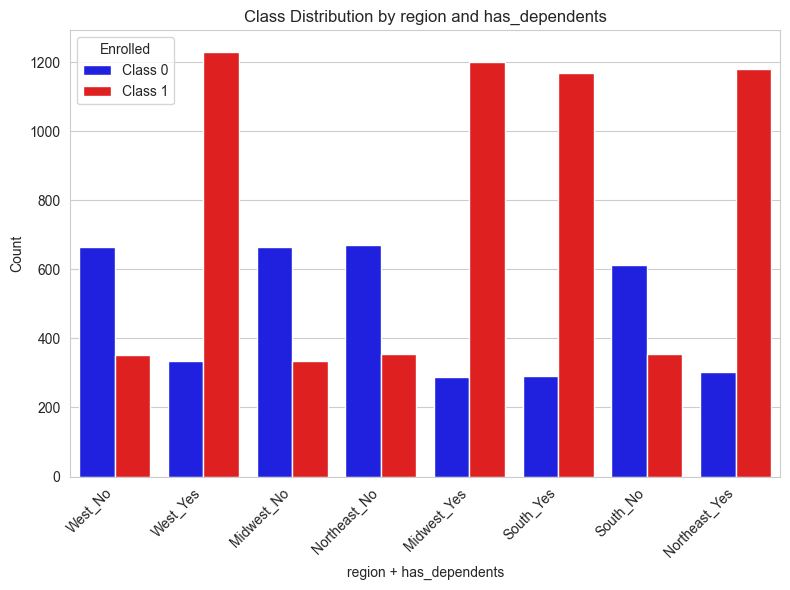

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

target_col = 'enrolled'
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Get all pairs of categorical columns
col_pairs = list(combinations(categorical_cols, 2))

for col1, col2 in col_pairs:
    combined_col = df[col1] + '_' + df[col2]
    
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=combined_col, hue=target_col, palette=['blue', 'red'])
    
    plt.title(f'Class Distribution by {col1} and {col2}')
    plt.xlabel(f'{col1} + {col2}')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Enrolled', labels=['Class 0', 'Class 1'])
    
    plt.tight_layout()
    plt.show()


HAS_DEPENDENTS and  EMPLOYMENT_TYPE show significant associations with enrollment status.

---
## 7. Correlation Analysis

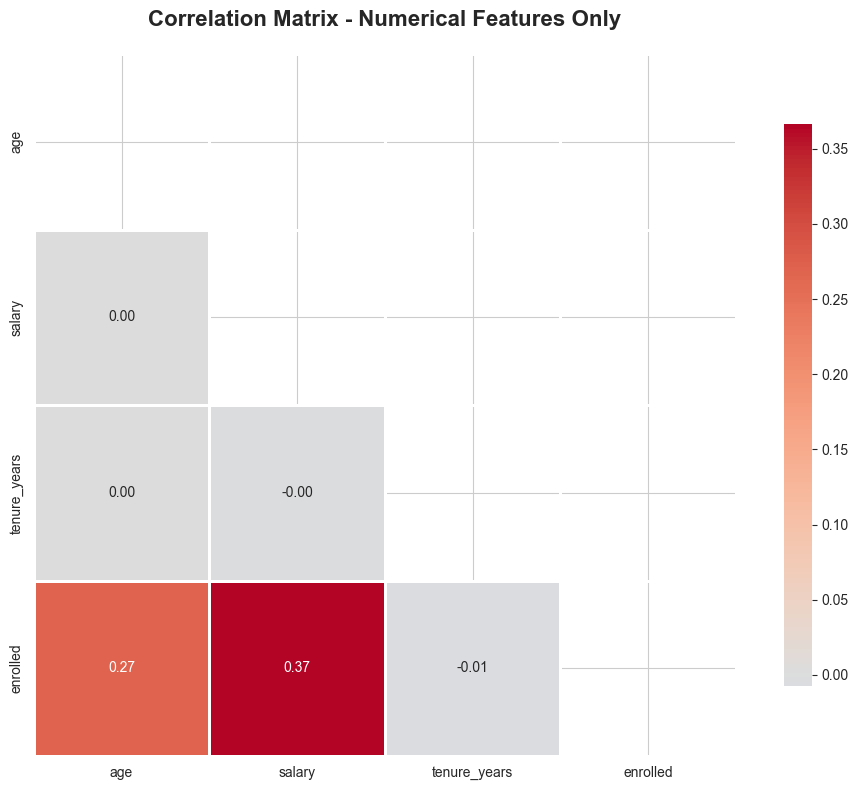

In [15]:
# Drop ID column first
df_clean = df.drop('employee_id', axis=1)

# Keep only numeric columns
df_numeric = df_clean.select_dtypes(include=['int64', 'float64'])

# Correlation matrix (Pearson by default)
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    mask=mask
)

plt.title('Correlation Matrix - Numerical Features Only', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



CORRELATION WITH TARGET VARIABLE (enrolled)

enrolled        1.00
salary          0.37
age             0.27
tenure_years   -0.01
Name: enrolled, dtype: float64


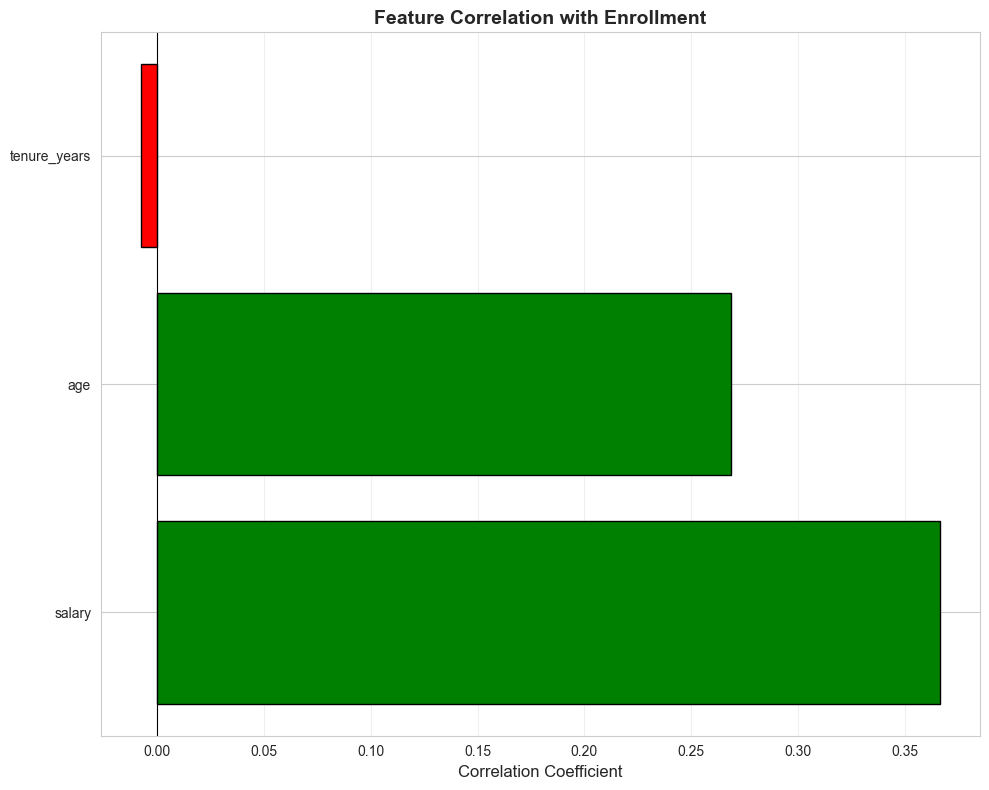

In [20]:
# Features most correlated with target
print("\n" + "=" * 70)
print("CORRELATION WITH TARGET VARIABLE (enrolled)")
print("=" * 70 + "\n")

target_corr = correlation_matrix['enrolled'].sort_values(ascending=False)
print(target_corr)

# Visualize
plt.figure(figsize=(10, 8))
target_corr_df = target_corr.drop('enrolled')  # Remove self-correlation
colors = ['green' if x > 0 else 'red' for x in target_corr_df]
plt.barh(range(len(target_corr_df)), target_corr_df, color=colors, edgecolor='black')
plt.yticks(range(len(target_corr_df)), target_corr_df.index)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title('Feature Correlation with Enrollment', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("correlation.png", bbox_inches="tight", dpi=300)
plt.show()

                 Cramers_V
has_dependents        0.45
employment_type       0.43
marital_status        0.02
region                0.01
gender                0.01


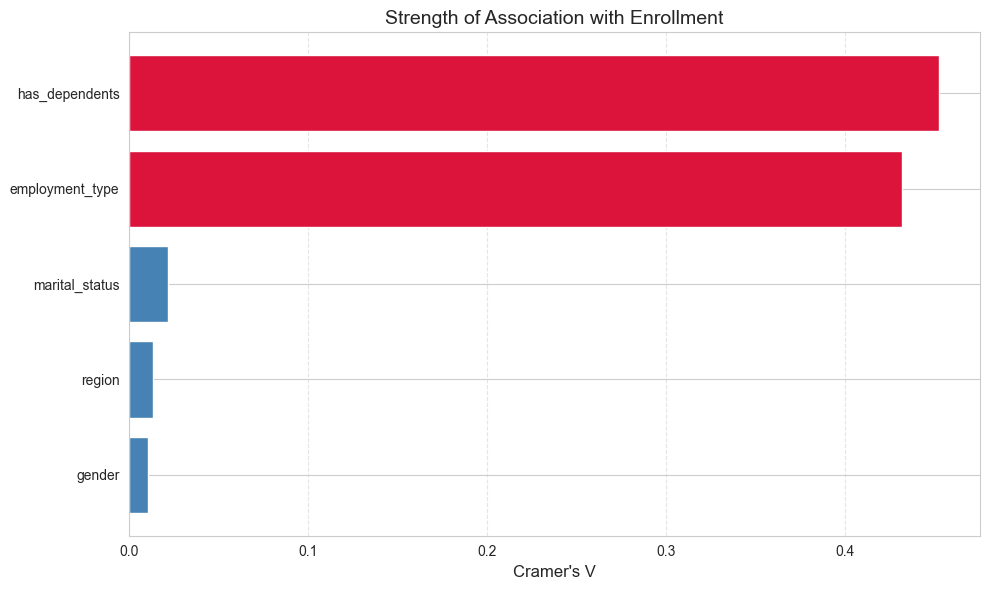

In [21]:
# Drop ID column
df_clean = df.drop('employee_id', axis=1)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

cramers_results = {}

for col in categorical_cols:
    cramers_results[col] = cramers_v(df_clean[col], df_clean['enrolled'])

cramers_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['Cramers_V'])
cramers_df = cramers_df.sort_values(by='Cramers_V', ascending=False)

print(cramers_df)


# Define threshold for "high" association
threshold = 0.2  # you can adjust this

values = cramers_df['Cramers_V']
features = cramers_df.index

# Color logic: highlight strong associations
colors = ['crimson' if v >= threshold else 'steelblue' for v in values]

plt.figure(figsize=(10, 6))

bars = plt.barh(features, values, color=colors)

plt.xlabel("Cramer's V", fontsize=12)
plt.title("Strength of Association with Enrollment", fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.gca().invert_yaxis()  # highest value on top
plt.tight_layout()
plt.savefig("cramers_v.png", bbox_inches="tight", dpi=300)
plt.show()


Cramér’s V is a statistical measure used to quantify the strength of association between two categorical variables, such as a feature (e.g., employment type) and a binary target (e.g., enrolled). It is derived from the Chi-Square test of independence and normalizes the Chi-Square statistic to produce a value between 0 and 1, where 0 indicates no relationship (variables are independent) and values closer to 1 indicate a stronger association. Unlike correlation, which measures linear relationships between numeric variables, Cramér’s V evaluates how much the distribution of one categorical variable changes across the categories of another, making it appropriate for categorical feature analysis in classification problems.

                      Feature  Mutual_Information
1                      salary                0.11
18         has_dependents_Yes                0.11
17          has_dependents_No                0.10
11  employment_type_Full-time                0.09
0                         age                0.06
12  employment_type_Part-time                0.05
10   employment_type_Contract                0.03
5                gender_Other                0.01
14           region_Northeast                0.01
13             region_Midwest                0.00
16                region_West                0.00
7      marital_status_Married                0.00
15               region_South                0.00
9      marital_status_Widowed                0.00
6     marital_status_Divorced                0.00
8       marital_status_Single                0.00
4                 gender_Male                0.00
3               gender_Female                0.00
2                tenure_years                0.00


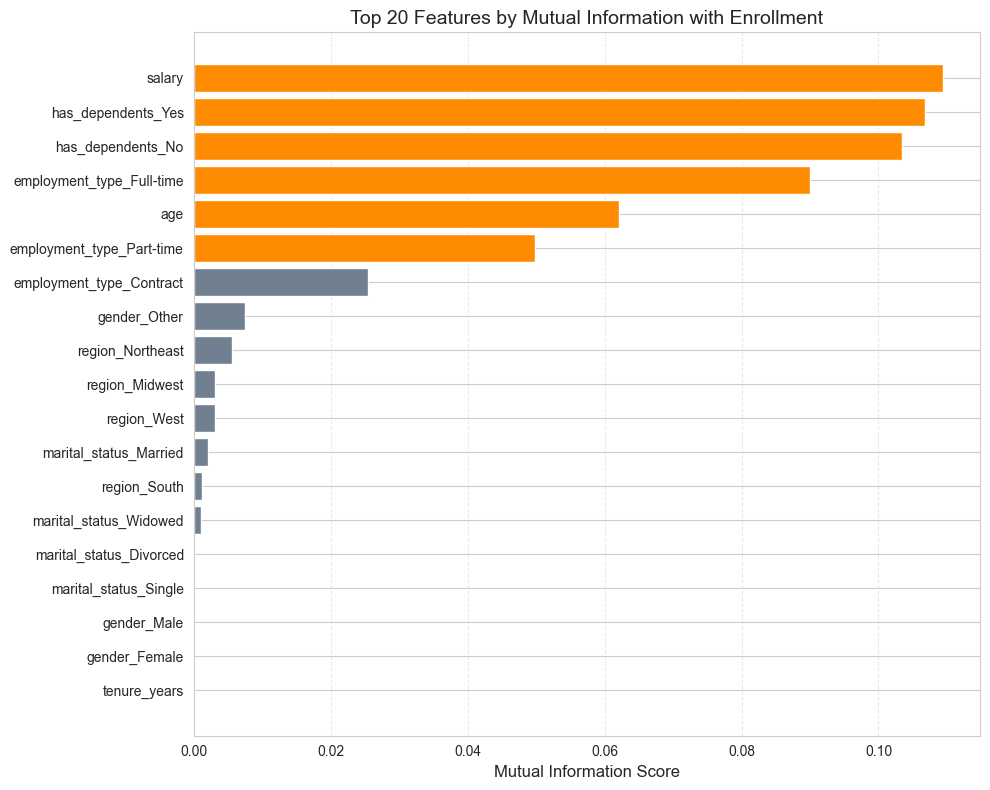

In [22]:
from sklearn.feature_selection import mutual_info_classif

# Drop ID
df_clean = df.drop('employee_id', axis=1)

X = df_clean.drop('enrolled', axis=1)
y = df_clean['enrolled']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# Compute mutual information
mi_scores = mutual_info_classif(X_encoded, y, discrete_features='auto')

mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Mutual_Information': mi_scores
}).sort_values(by='Mutual_Information', ascending=False)

print(mi_df.head(20))

# Take top 20 (already sorted)
top_n = 20
mi_top = mi_df.head(top_n)

values = mi_top['Mutual_Information']
features = mi_top['Feature']

# Define dynamic threshold (top 25% as high impact)
threshold = np.percentile(values, 70)

colors = ['darkorange' if v >= threshold else 'slategray' for v in values]

plt.figure(figsize=(10, 8))

bars = plt.barh(features, values, color=colors)

plt.xlabel("Mutual Information Score", fontsize=12)
plt.title("Top 20 Features by Mutual Information with Enrollment", fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("mutual_information.png", bbox_inches="tight", dpi=300)
plt.show()


Mutual Information (also called Information Gain in classification settings) measures how much knowing a feature reduces uncertainty about the target variable. It is based on the concept of entropy, which quantifies uncertainty in a system. If the target variable (e.g., enrolled) has high uncertainty, entropy is high. When we condition on a feature (e.g., salary), entropy may decrease if that feature helps separate the classes. Mutual Information is simply the amount by which entropy decreases after observing the feature. It is always non-negative, does not assume linear relationships, and can detect both linear and nonlinear dependencies. A higher Mutual Information value means the feature provides more predictive signal about the target, while a value near zero indicates the feature does not meaningfully reduce uncertainty about the outcome.

has_dependents, employment_type, age, salary have higher correlation with enrollment

---
## 8. Outlier Detection

In [19]:
print("\n" + "=" * 70)
print("NUMERICAL FEATURE OUTLIER ANALYSIS (IQR METHOD)")
print("=" * 70 + "\n")

summary_results = []

for column in numerical_cols:
    
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    
    outlier_mask = (df[column] < lower_threshold) | (df[column] > upper_threshold)
    outlier_count = outlier_mask.sum()
    total_count = len(df)
    outlier_percentage = (outlier_count / total_count) * 100
    
    summary_results.append({
        "Feature": column,
        "Q1": round(q1, 2),
        "Q3": round(q3, 2),
        "IQR": round(iqr, 2),
        "Lower_Bound": round(lower_threshold, 2),
        "Upper_Bound": round(upper_threshold, 2),
        "Outlier_Count": outlier_count,
        "Outlier_%": round(outlier_percentage, 2)
    })
    
    print(f"{column.upper()}")
    print(f"  Q1: {q1:.2f} | Q3: {q3:.2f} | IQR: {iqr:.2f}")
    print(f"  Acceptable Range: [{lower_threshold:.2f}, {upper_threshold:.2f}]")
    print(f"  Outliers Detected: {outlier_count} ({outlier_percentage:.2f}%)")
    print("-" * 50)

# Optional: create summary dataframe for reporting
outlier_summary_df = pd.DataFrame(summary_results).sort_values(
    by="Outlier_%", ascending=False
)

print("\nSummary (sorted by % of outliers):")
print(outlier_summary_df)



NUMERICAL FEATURE OUTLIER ANALYSIS (IQR METHOD)

AGE
  Q1: 33.00 | Q3: 54.00 | IQR: 21.00
  Acceptable Range: [1.50, 85.50]
  Outliers Detected: 0 (0.00%)
--------------------------------------------------
SALARY
  Q1: 54714.34 | Q3: 75053.69 | IQR: 20339.35
  Acceptable Range: [24205.32, 105562.71]
  Outliers Detected: 50 (0.50%)
--------------------------------------------------
TENURE_YEARS
  Q1: 1.20 | Q3: 5.60 | IQR: 4.40
  Acceptable Range: [-5.40, 12.20]
  Outliers Detected: 410 (4.10%)
--------------------------------------------------

Summary (sorted by % of outliers):
        Feature       Q1       Q3      IQR  Lower_Bound  Upper_Bound  \
2  tenure_years     1.20     5.60     4.40        -5.40        12.20   
1        salary 54714.34 75053.69 20339.34     24205.32    105562.70   
0           age    33.00    54.00    21.00         1.50        85.50   

   Outlier_Count  Outlier_%  
2            410       4.10  
1             50       0.50  
0              0       0.00  


# Key Insights – Enrollment Analysis

---

## 1. Dataset Overview

- Total Records: 10,000  
- Total Features: 10  
- Missing Values: None  
- Duplicate Rows: None  
- Target Variable: `enrolled`  

The dataset is clean, consistent, and suitable for statistical analysis and predictive modeling without additional preprocessing for missing or duplicate values.

---

## 2. Target Distribution

- Enrolled (1): 61.74%  
- Not Enrolled (0): 38.26%

The target variable shows a mild class imbalance. While not severe, applying class weighting during modeling may improve minority class prediction performance if necessary.

---

## 3. Numerical Feature Analysis

<div style="display: flex; align-items: center; gap: 40px;">

<div style="flex: 1;">

### Correlation with Enrollment

Pearson correlation was used to evaluate relationships between numerical variables and the target.

**Salary**
- Mean (Enrolled): 69,337  
- Mean (Not Enrolled): 58,087  
- Correlation: 0.37 (moderate positive)  
- Statistically significant (p < 0.05)

Higher salary significantly increases the likelihood of enrollment.

**Age**
- Mean (Enrolled): 45.6  
- Mean (Not Enrolled): 38.8  
- Correlation: 0.27 (moderate positive)  
- Statistically significant (p < 0.05)

Older employees are more likely to enroll.

**Tenure Years**
- Correlation: -0.01  
- Not statistically significant  

Tenure has no meaningful impact on enrollment decisions.

Overall, salary and age are the primary numerical drivers of enrollment behavior.

</div>

<div style="flex: 1;">
<img src="correlation.png" width="100%">
</div>

</div>

---

## 4. Categorical Feature Analysis (Chi-Square and Cramér’s V)

<div style="display: flex; align-items: center; gap: 40px;">

<div style="flex: 1;">

Chi-square tests confirmed whether associations exist, and Cramér’s V measured their strength.

### Strong Associations

**Has Dependents**
- Enrollment Rate (Yes): 79.7%  
- Enrollment Rate (No): 34.8%  
- Cramér’s V: Strong association  

Having dependents is the strongest categorical predictor of enrollment. Employees with dependents are substantially more likely to enroll.

**Employment Type**
- Enrollment Rate (Full-time): 75.3%  
- Enrollment Rate (Contract): 31.2%  
- Enrollment Rate (Part-time): 28.5%  
- Cramér’s V: Strong association  

Full-time employment is a major driver of enrollment, indicating that job stability plays a significant role.

### Weak or No Association

- Gender  
- Marital Status  
- Region  

These variables show negligible association (very low Cramér’s V) and limited predictive value.

</div>

<div style="flex: 1;">
<img src="cramers_v.png" width="100%">
</div>

</div>

---

## 5. Mutual Information (Overall Feature Importance)

<div style="display: flex; align-items: center; gap: 40px;">

<div style="flex: 1;">

Mutual Information was computed to capture both linear and nonlinear relationships between features and enrollment.

### Top Informative Features

- Salary  
- Has Dependents  
- Employment Type (Full-time indicator)  
- Age  

### Low-Impact Features

- Tenure Years  
- Gender  
- Marital Status  
- Region  

Mutual Information results confirm the findings from correlation and Cramér’s V analysis, strengthening confidence in feature selection.

</div>

<div style="flex: 1;">
<img src="mutual_information.png" width="100%">
</div>

</div>

---

## 6. Overall Feature Strength Ranking

### Strongest Predictors
1. Has Dependents  
2. Employment Type  
3. Salary  
4. Age  

### Weak Predictors
- Tenure Years  
- Gender  
- Marital Status  
- Region  

---

## Final Conclusion

Enrollment decisions are primarily influenced by:

- Financial capacity (Salary)  
- Life stage (Age)  
- Family responsibility (Has Dependents)  
- Employment stability (Full-time status)  

Demographic attributes such as gender, marital status, and region do not significantly impact enrollment behavior.

For predictive modeling, feature selection should prioritize salary, age, dependents status, and employment type, as these variables consistently demonstrate statistical significance and practical relevance across multiple evaluation methods.